# <font color="#8333ff">Projet 6 : Détectez des faux billets</font>

### Dans ce projet, il est question de predire la veracité d'un billet de banque à l'aide d'une régression logistique.

L' échantillon contient 170 billets, caractérisés par :

- la diagonale ;
- la hauteur gauche ;
- la hauteur droite;
- la marge basse ;
- la marge haute ;
- la longueur ;

La variable is_genuine est la variable qui indique si le billet est un vrai (1) ou pas (0).

#  <font color="#8333ff">Sommaire <a id="sommaire"></a>
0. **[<font color="8333ff">Mission 0 : Analyse univariée et bivariée](#mission0)<br/>**
   0.1 [<font color="black">Moyenne par variable](#moyennevar)<br/>
   0.2 [<font color="black">Distribution VRAI /FAUX](#distribution)<br/>
   0.3 [<font color="black">Corrélations linéaires entre variables](#correlation)<br/>
1. **[<font color="8333ff">Mission 1 : Analyse en composantes principales de l'échantillon](#mission1)<br/>**
   1.1 [<font color="black">Selection des variables pour l'ACP](#varacp)<br/>
   1.2 [<font color="black">Eboulis des valeurs propres](#eboulis)<br/>
   1.3 [<font color="black">Représentation des variables par le cercle des corrélations et projection des individus](#acplot)<br/>
   1.4 [<font color="black">Analyse de la contribution des variables à chaque axe](#contrivar)<br/>
   1.5 [<font color="black">Qualite de representation des individus](#qualite)<br/>
2. **[<font color="8333ff">Mission 2 : Clustering K-means](#mission2)<br/>**
3. **[<font color="8333ff">Mission 3-A : Regression logistique sur données brutes](#mission3a)<br/>**
   3.1 [<font color="black">Modelisation avec package Stats model sur les 3 variables](#sm1)<br/>
   3.2 [<font color="black">Préparation de l'échantillon pour regression logistique Sikit learn](#prepaskt1)<br/>
   3.3 [<font color="black">Exécution de la régression logistique sur les données d'apprentissage](#reglog1)<br/>
   3.4 [<font color="black">Prédiction sur l'échantillon test](#predtestlog1)<br/>
   3.5 [<font color="black">Prédiction sur l'échantillon train](#predtrainlog1)<br/>
   3.6 [<font color="black">Recherche des billets mal prédits](#malpredits1)<br/>
4. **[<font color="8333ff">Mission 3-B : Regression logistique sur données ACP](#mission3b)<br/>**
   4.1 [<font color="black">Modelisation avec package Stats model sur les composantes principales](#sm2)<br/>
   4.2 [<font color="black">Préparation de l'échantillon pour regression logistique Sikit learn](#prepaskt2)<br/>
   4.3 [<font color="black">Exécution de la régression logistique sur les données d'apprentissage](#reglog2)<br/>
   4.4 [<font color="black">Prédiction sur l'échantillon test](#predtestlog2)<br/>
   4.5 [<font color="black">Prédiction sur l'échantillon train](#predtrainlog2)<br/>
   4.6 [<font color="black">Recherche des billets mal prédits](#malpredits2)<br/>

Chargement des librairies nécessaires :

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy import stats
from scipy.cluster.hierarchy import linkage, fcluster
from sklearn import preprocessing
import seaborn as sns
from functions import *
import statsmodels.formula as smf
import statsmodels.api as sm
from sklearn.cluster import KMeans
from sklearn import metrics

In [4]:
# import de l'échantillon
data = pd.read_csv("notes.csv")
data.iloc[0:100,0] = 1
data.iloc[100:,0] = 0
data.head()

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.67,103.74,103.70,4.01,2.87,113.29
2,1,171.83,103.76,103.76,4.40,2.88,113.84
3,1,171.80,103.78,103.65,3.73,3.12,113.63
4,1,172.05,103.70,103.75,5.04,2.27,113.55


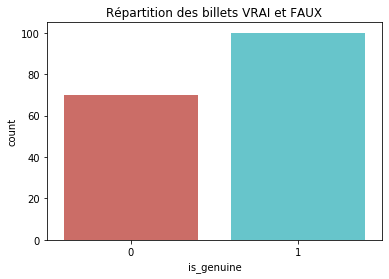

In [5]:
# Répartition effectif billet VRAI et billet FAUX
sns.countplot(x='is_genuine',data=data, palette ='hls')
plt.title('Répartition des billets VRAI et FAUX')
plt.show()

## [<font color="#8333ff"> Mission 0 : Analyse univariée et bivariée](#sommaire)
<a id="mission0" a>

### [<font color="black"> Moyenne par variable](#sommaire)
<a id="moyennevar" a>

In [6]:
# Moyenne par variable
data.groupby('is_genuine').mean()

,diagonal,height_left,height_right,margin_low,margin_up,length
is_genuine,,,,,,
0,171.889857,104.230429,104.145571,5.281571,3.334571,111.660714
1,171.976100,103.951500,103.775900,4.143500,3.055500,113.207200


In [7]:
# Statistiques par variable
round(data.groupby('is_genuine').agg(['mean', 'std','min','max','mad']),2).T

is_genuine              0       1
diagonal     mean  171.89  171.98
             std     0.30    0.31
             min   171.38  171.04
             max   173.01  172.75
             mad     0.23    0.24
height_left  mean  104.23  103.95
             std     0.21    0.30
             min   103.78  103.23
             max   104.72  104.86
             mad     0.17    0.23
height_right mean  104.15  103.78
             std     0.25    0.29
             min   103.44  103.14
             max   104.86  104.95
             mad     0.19    0.23
margin_low   mean    5.28    4.14
             std     0.54    0.31
             min     3.82    3.54
             max     6.28    5.04
             mad     0.43    0.26
margin_up    mean    3.33    3.06
             std     0.19    0.20
             min     2.98    2.27
             max     3.68    3.53
             mad     0.15    0.15
length       mean  111.66  113.21
             std     0.68    0.38
             min   109.97  111.76
             max   113.64  113.98
             mad     0.51    0.30

**Premiers constats :**

- Les marges (hautes et surtout basses) sont en moyenne plus élevées pour les billets FAUX que les billets VRAIS

- Les billets VRAI sont en moyenne plus longs que les billets FAUX

### [<font color="black"> Distribution VRAI /FAUX](#sommaire)
<a id="distribution" a>

In [8]:
sns.set_context('notebook', font_scale = 1)

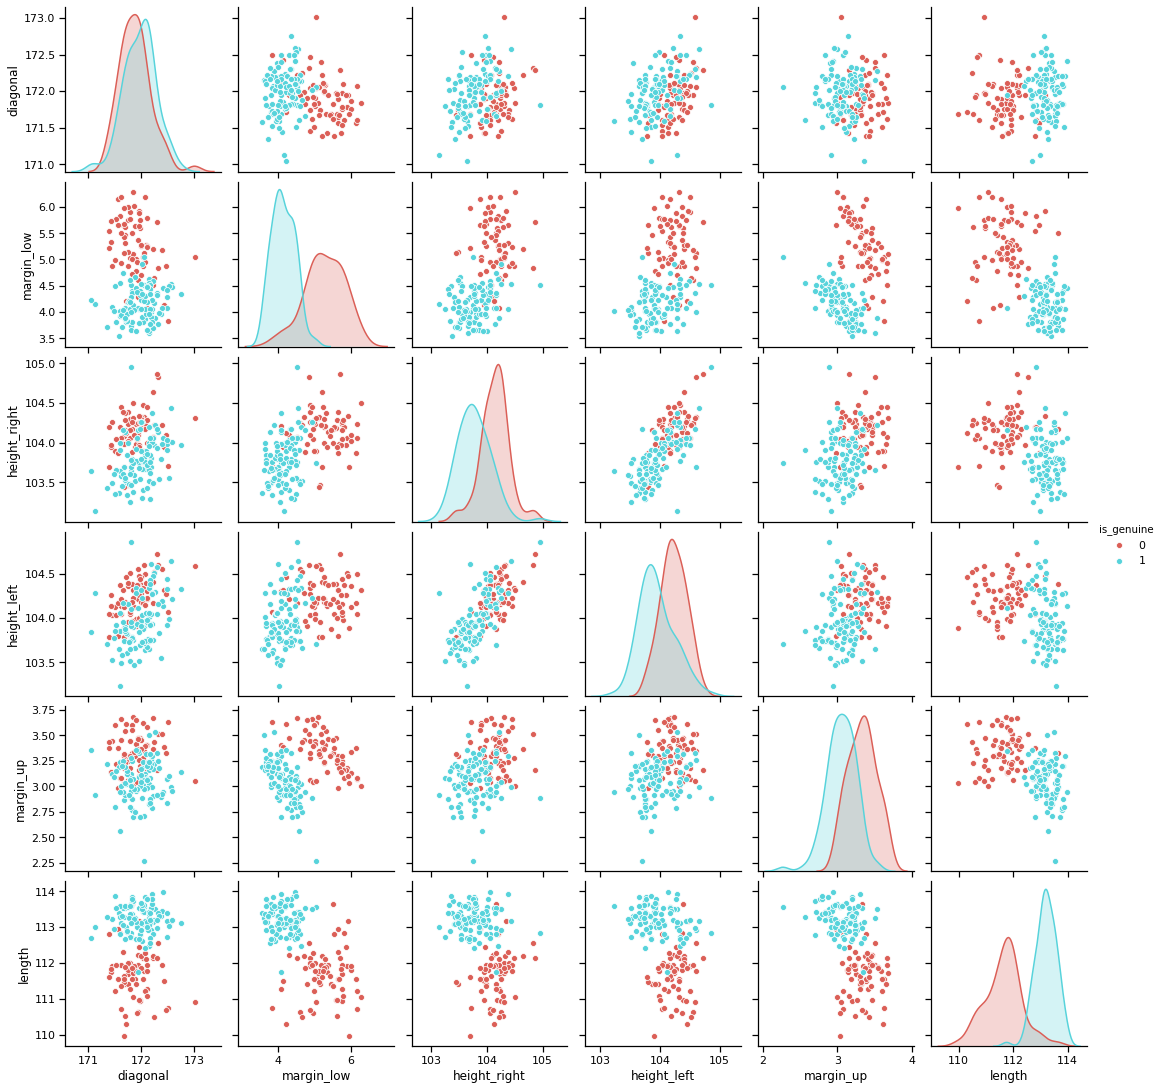

In [9]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
sns.pairplot(data, hue='is_genuine',vars =data[['diagonal','margin_low','height_right','height_left', 'margin_up', 'length']] , palette ='hls', )
sns.set_context(font_scale = 2)

**Constat :** La variable lenght est clivante

### [<font color="black"> Corrélations linéaires entre variables](#sommaire)
<a id="correlation" a>

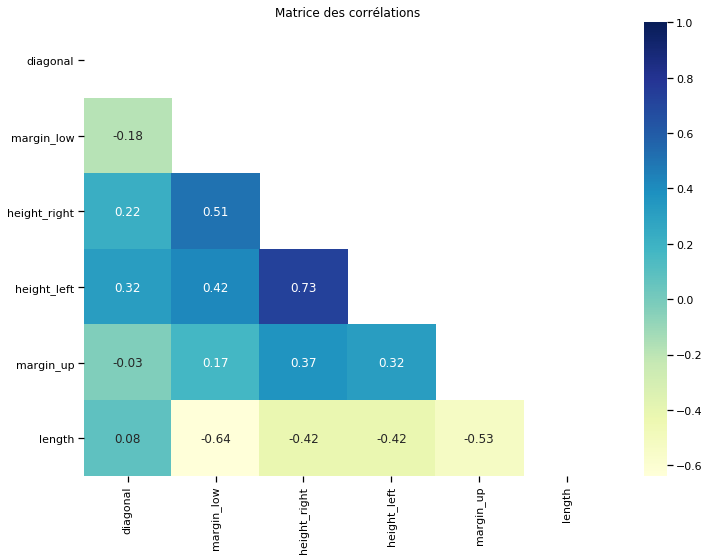

In [10]:
data_corr = data[['diagonal','margin_low','height_right','height_left', 'margin_up', 'length']].corr()
mask=np.triu(np.ones(data_corr.shape)).astype(np.bool)
# create heatmap
sns.heatmap(round(data_corr,2), annot=True, cmap="YlGnBu" ,fmt='g',mask =mask)
plt.tight_layout()
plt.title('Matrice des corrélations', y=1.1)
plt.gcf().set_size_inches(12, 10)

**Constats :** 
- Les variables height_right et height_left sont bien corrélées

- La variable lenght est anti-corrélée à toutes les autres variables 

## [<font color="#8333ff"> Mission 1 :  Analyse en composantes principales de l'échantillon](#sommaire)
<a id="mission1" a> 

### [<font color="black"> Selection des variables pour l'ACP](#sommaire)
<a id="varacp" a> 

In [12]:
# Toutes les variables en entrée
data_pca = data[['diagonal','margin_low','height_right','height_left', 'margin_up', 'length']]
data_pca.head()

,diagonal,margin_low,height_right,height_left,margin_up,length
0,171.81,4.52,104.95,104.86,2.89,112.83
1,171.67,4.01,103.70,103.74,2.87,113.29
2,171.83,4.40,103.76,103.76,2.88,113.84
3,171.80,3.73,103.65,103.78,3.12,113.63
4,172.05,5.04,103.75,103.70,2.27,113.55


### [<font color="black">Eboulis des valeurs propres](#sommaire)
<a id="eboulis" a> 

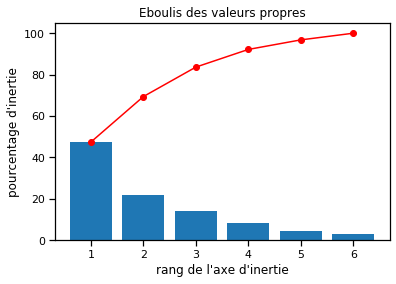

In [13]:
# choix du nombre de composantes à calculer
n_comp = 6

# préparation des données pour l'ACP
X = data_pca.values
names = data.index
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Eboulis des valeurs propres
display_scree_plot(pca)

**Décision :** En selectionnant les 4 premières composantes principales, nous conservons 90% de l'information.

### [<font color="black">Représentation des variables par le cercle des corrélations et projection des individus](#sommaire)
<a id="acplot" a> 

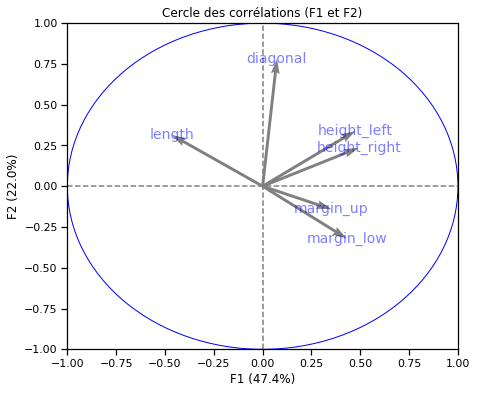

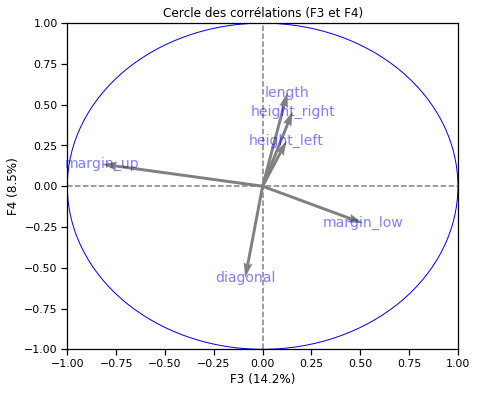

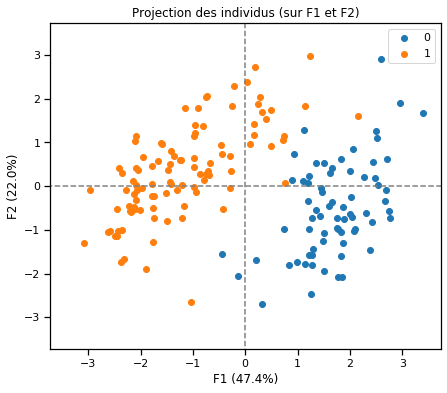

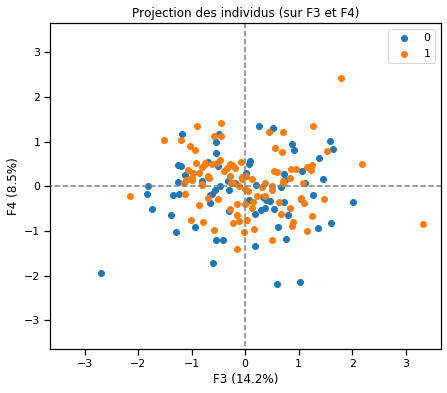

In [14]:
# choix du nombre de composantes à calculer
n_comp = 4

# préparation des données pour l'ACP
X = data_pca.values
names = data.index
features = data_pca.columns

# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1)], labels = np.array(features))
display_circles(pcs, n_comp, pca, [(2,3)], labels = np.array(features))


# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1)], illustrative_var = data.is_genuine)
display_factorial_planes(X_projected, n_comp, pca, [(2,3)],illustrative_var = data.is_genuine)

plt.show()

**Constats :**
- Le plan F1,F2 permet de facilement cliver les individus selon VRAI / FAUX. </br>
- Les billets FAUX ont tendance à avoir des valeurs fortes pour F1 </br>
- Les billets VRAI ont tendance à avoir des valeurs faibles pour F1 </br>
- Les corrélations constatées en premières partie se remarquent sur F1 F2

- Sur le plan F3, F4, les individus ne sont pas séparés, il n'est pas utile de l'utiliser pour la suite de l'expérience </br>

In [15]:
## 3D  : https://matplotlib.org/3.1.3/gallery/mplot3d/scatter3d.html

### [<font color="black">Analyse de la contribution des variables à chaque axe](#sommaire)
<a id="contrivar" a> 

In [16]:
contri_var = pd.DataFrame(data = pcs,index = ['principal component 1', 'principal component 2',
                                 'principal component 3', 'principal component 4' ], columns = ['diagonal', 'height_right','height_left', 'margin_low',
                                 'margin_up', 'length']).T
contri_var.sort_values('principal component 1', ascending = False)

,principal component 1,principal component 2,principal component 3,principal component 4
height_left,0.491821,0.235543,0.153830,0.458938
margin_low,0.475502,0.339250,0.122760,0.278046
height_right,0.431027,-0.320537,0.512808,-0.226528
margin_up,0.352540,-0.141120,-0.821149,0.135340
diagonal,0.073275,0.779639,-0.088894,-0.559732
length,-0.465373,0.314536,0.126913,0.573703


### [<font color="black">Qualite de representation des individus](#sommaire)
<a id="qualite" a> 

In [17]:
# Contribution des individus à chaque axe
principalDf = pd.DataFrame(data = X_projected,index = data.index
             ,columns = ['principal component 1', 'principal component 2','principal component 3','principal component 4'])
principalDf = pd.merge(principalDf,data,left_index=True, right_index=True)
principalDf = principalDf.iloc[:,0:5]
principalDf.sort_values('principal component 1', ascending = False).head()

,principal component 1,principal component 2,principal component 3,principal component 4,is_genuine
122,3.390904,1.664612,1.385046,0.642833,0
112,2.947422,1.908265,-0.489009,1.165304,0
158,2.768423,-0.736702,2.008253,-0.360490,0
101,2.737353,-0.556990,-0.308179,-0.544677,0
147,2.702006,0.631099,-0.931433,-0.902197,0


In [18]:
# Contribution des individus dans l'inertie totale
di = np.sum(X_projected**2,axis=1)
pd.DataFrame({'ID':data.index,'d_i':di}).sort_values('d_i',ascending = False).head()

,ID,d_i
166,166,20.290967
4,4,17.664926
122,122,16.600749
0,0,16.313964
112,112,13.925836


In [19]:
# Calcul des cosinus 
cos2 = X_projected**2
for j in range(n_comp):
 cos2[:,j] = cos2[:,j]/di

qualite = pd.DataFrame({'id':data.index,'COS2_1':cos2[:,0],'COS2_2':cos2[:,1],'COS2_3':cos2[:,2],'COS2_4':cos2[:,3]})
qualite.sort_values('COS2_1',ascending = False ).head()

,id,COS2_1,COS2_2,COS2_3,COS2_4
99,99,0.983745,0.014867,3.672806e-07,0.001387
143,143,0.982254,0.007652,6.570097e-06,0.010087
46,46,0.970411,0.003371,1.621350e-03,0.024596
132,132,0.960183,0.013488,2.356167e-02,0.002767
111,111,0.959910,0.030944,8.135470e-03,0.001011


In [20]:
# Jointure sur contribution et qualtie de representation
qual_contri = pd.merge(qualite,principalDf,left_index = True, right_index = True)
qual_contri = qual_contri.loc[:,['COS2_1','COS2_2','principal component 1','principal component 2']].sort_values('principal component 1', ascending = False)

qual_contri = pd.merge(qual_contri,data,left_index=True, right_index=True)
qual_contri = qual_contri.iloc[:,0:5]
qual_contri.sort_values('COS2_1',ascending= False).head()

,COS2_1,COS2_2,principal component 1,principal component 2,is_genuine
99,0.983745,0.014867,-1.783442,-0.219247,1
143,0.982254,0.007652,2.265472,0.199957,0
46,0.970411,0.003371,-1.307882,-0.077086,1
132,0.960183,0.013488,2.019419,-0.239349,0
111,0.959910,0.030944,1.991733,0.357605,0


## [<font color="#8333ff"> Mission 2 : Clustering K-means](#sommaire)
<a id="mission2" a> 

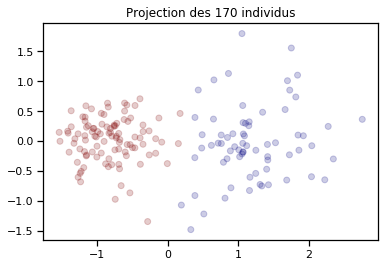

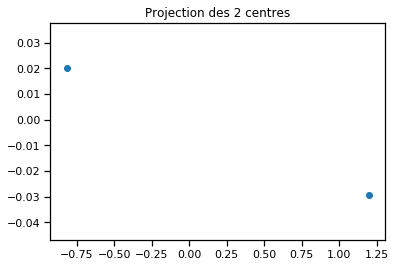

In [30]:
# Nombre de clusters souhaités
n_clust = 2

# préparation des données pour le clustering
X = data_pca.values

# Centrer et réduire n'est ici pas nécessaire car les variables sont exprimées dans la même unité
X_scaled = preprocessing.StandardScaler().fit_transform(X)

# Clustering par K-means
km = KMeans(n_clusters= n_clust)
km.fit(X)

# Récupération des clusters attribués à chaque individu
clusters = km.labels_

# Affichage du clustering par projection des individus sur le premier plan factoriel
pca = decomposition.PCA(n_components=2).fit(X)
X_projected = pca.transform(X)
plt.scatter(X_projected[:, 0], X_projected[:, 1], c=clusters.astype(np.float), cmap = 'jet', alpha=.2)
plt.title("Projection des {} individus".format(X_projected.shape[0]))

plt.figure()
centroids = km.cluster_centers_
centroids_projected = pca.transform(centroids)
plt.scatter(centroids_projected[:,0],centroids_projected[:,1])
plt.title("Projection des {} centres".format(len(centroids)))
plt.show()

In [31]:
# Billets mal predits par le Kmeans
km = pd.DataFrame({"Numero de billet" : data.index, "K-means cluster" : clusters, "is_genuine" : data.is_genuine})
km.head()

,Numero de billet,K-means cluster,is_genuine
0,0,1,1
1,1,1,1
2,2,1,1
3,3,1,1
4,4,1,1


In [114]:
km['K-means cluster']

0      1
1      1
2      1
3      1
4      1
      ..
165    0
166    0
167    0
168    0
169    0
Name: K-means cluster, Length: 170, dtype: int32

In [98]:
# Confrontation entre Y obs. sur l’éch. test et la prédiction Kmeans
cm_km = metrics.confusion_matrix(km['is_genuine'],km['K-means cluster'])
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cm_km), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

ValueError: Classification metrics can't handle a mix of unknown and binary targets

In [33]:
# Les billets mal prédits 
print(km.loc[(km['K-means cluster'] == 0) & (km['is_genuine'] == 1)])
print(km.loc[(km['K-means cluster'] == 1) & (km['is_genuine'] == 0)])

    Numero de billet  K-means cluster is_genuine
69                69                0          1
     Numero de billet  K-means cluster is_genuine
102               102                1          0
118               118                1          0


## [<font color="#8333ff"> Mission 3-A : Regression logistique sur données brutes](#sommaire)
<a id="mission3a" a>  

Import des librairies nécessaires


In [34]:
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn import model_selection
from sklearn.metrics import roc_curve, auc
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

### [<font color="black">Modelisation avec package Stats model sur les 3 variables](#sommaire)
<a id="sm1" a> 

Nous profitons du package stats models pour un summary :

Initalement, nous mettons en entrée les 6 variables et nous vérifions les p-value associée à chacune des variables.

Avec 6 variables, toutes les p-values sont bien supérieures à 5 %, on supprime donc progressivement la variable pour laquelle la p-value est la plus forte. Jusqu'à obtenir que des variables aux p-values toutes inférieures à 5 %

In [35]:
y = data['is_genuine']
X = data[['diagonal','margin_low', 'length']]
print(len(y))
print(data.shape)
logit_model=sm.Logit(y.astype(float),X.astype(float))
result=logit_model.fit(method='bfgs')
print(result.summary2())

170
(170, 7)
Optimization terminated successfully.
         Current function value: 0.029926
         Iterations: 33
         Function evaluations: 37
         Gradient evaluations: 37
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.956     
Dependent Variable: is_genuine       AIC:              16.1748   
Date:               2020-03-31 19:12 BIC:              25.5822   
No. Observations:   170              Log-Likelihood:   -5.0874   
Df Model:           2                LL-Null:          -115.17   
Df Residuals:       167              LLR p-value:      1.5487e-48
Converged:          1.0000           Scale:            1.0000    
------------------------------------------------------------------
             Coef.    Std.Err.     z     P>|z|    [0.025    0.975]
------------------------------------------------------------------
diagonal     -4.6736    1.6533  -2.8269  0.0047   -7.9139  -1.4333
margin_low  -12.2059    4.2043  -2.9032  0.00

### [<font color="black">Préparation de l'échantillon pour regression logistique Sikit learn](#sommaire)
<a id="prepaskt1" a> 

In [91]:
# Selection des 3 variables
y = data['is_genuine'].values
X = data[['diagonal','margin_low', 'length']].values
# Split de l'échantillon (80 % train et 20% test), stratifies 
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size = 0.2,random_state=0,stratify=y)
print('Echantillon de train',X_train.shape,y_train.shape)
print ('Echantillon de test',X_test.shape,y_test.shape)


Echantillon de train (136, 3) (136,)
Echantillon de test (34, 3) (34,)


### [<font color="black">Exécution de la régression logistique sur les données d'apprentissage](#sommaire)
<a id="reglog1" a> 

In [104]:
# convert string or float values to 0 .. n classes.
lab_enc = preprocessing.LabelEncoder()
training_scores_encoded = lab_enc.fit_transform(y_train)
testing_scores_encoded = lab_enc.fit_transform(y_test)

In [101]:
# Load libraries
import numpy as np
from sklearn import linear_model, datasets
from sklearn.model_selection import GridSearchCV

# Create logistic regression
logistic = linear_model.LogisticRegression()

# Create regularization penalty space
penalty = ['l2']

# Create regularization hyperparameter space
C = np.logspace(0, 4, 10)

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf = GridSearchCV(logistic, hyperparameters, cv=10, verbose=0)

# Fit grid search
best_model = clf.fit(X_train, training_scores_encoded)

# View best hyperparameters
print('Best Penalty:', best_model.best_estimator_.get_params()['penalty'])
print('Best C:', best_model.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [105]:
logreg2=LogisticRegression(C=1.0,penalty="l2",solver='lbfgs')
logreg2.fit(X_train,training_scores_encoded)
print("score",logreg2.score(X_test,testing_scores_encoded))
print("Les coefficients sont :",logreg2.coef_)

score 1.0
Les coefficients sont : [[ 0.25733249 -2.75622833  2.60998815]]


### [<font color="black">Prédiction sur l'échantillon test](#sommaire)
<a id="predtestlog1" a> 

In [106]:
#calcul des prédictions
y_pred = logreg2.predict(X_test)
y_pred = pd.DataFrame(y_pred,columns=['Prédiction reg log'])

#calcul des probas d'affectation sur ech. test
probas = logreg2.predict_proba(X_test)
probas = pd.DataFrame(probas,columns=['Probalité négative','Probalité positive'])


pred_test = pd.merge(y_pred,probas,left_index=True, right_index=True )
pred_test.sort_values('Probalité négative',ascending = False)

,Prédiction reg log,Probalité négative,Probalité positive
0,0,0.999662,0.000338
32,0,0.999321,0.000679
10,0,0.998105,0.001895
22,0,0.995852,0.004148
7,0,0.992671,0.007329
18,0,0.992091,0.007909
30,0,0.990037,0.009963
26,0,0.955594,0.044406
13,0,0.945957,0.054043
23,0,0.874679,0.125321


Text(0.5, 12.5, 'Predicted label')

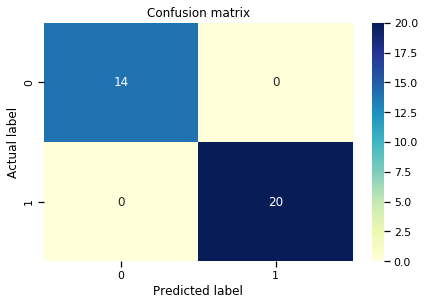

In [112]:
# confrontation entre Y obs. sur l’éch. test et la prédiction
cm = metrics.confusion_matrix(testing_scores_encoded,y_pred['Prédiction reg log'])
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cm), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### [<font color="black">Prédiction sur l'échantillon train](#sommaire)
<a id="predtrainlog1" a> 

Text(0.5, 12.5, 'Predicted label')

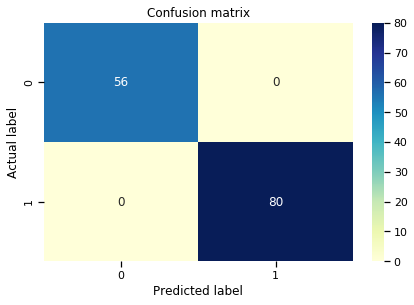

In [123]:
y_pred_train = logreg2.predict(X_train)
y_pred_train = pd.DataFrame(training_scores_encoded,columns=['Prédiction reg log train'])

#calcul des probas d'affectation sur ech. test
probas_train = logreg2.predict_proba(X_train)
probas_train = pd.DataFrame(probas_train,columns=['Probalité négative','Probalité positive'])

pred_train = pd.merge(y_pred_train,probas_train,left_index=True, right_index=True )

# confrontation entre Y obs. sur l’éch. test et la prédiction
cm_train = metrics.confusion_matrix(training_scores_encoded ,y_pred_train['Prédiction reg log train'])
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cm_train), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### [<font color="black">Courbe de ROC ](#sommaire)
<a id="roc1" a> 

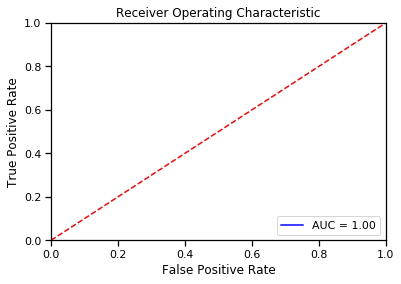

In [116]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
fpr, tpr, threshold = metrics.roc_curve(testing_scores_encoded,y_pred['Prédiction reg log'])
roc_auc = metrics.auc(fpr, tpr)
roc_auc


# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

## [<font color="#8333ff"> Mission 3-B : Régression logistique sur composantes principales de l'ACP](#sommaire)
<a id="mission3b" a>    

### [<font color="black">Modelisation avec package Stats model sur les compostantes ACP](#sommaire)
<a id="sm2" a> 

In [124]:
y_acp = principalDf['is_genuine']
X_acp = principalDf[['principal component 1','principal component 2']]

print(len(y_acp))
print(principalDf.shape)
logit_model=sm.Logit(y_acp.astype(float),X_acp.astype(float))
result_acp=logit_model.fit(method='bfgs')
print(result_acp.summary2())

170
(170, 5)
Optimization terminated successfully.
         Current function value: 0.087902
         Iterations: 16
         Function evaluations: 17
         Gradient evaluations: 17
                           Results: Logit
Model:                Logit             Pseudo R-squared:  0.870     
Dependent Variable:   is_genuine        AIC:               33.8865   
Date:                 2020-04-01 17:48  BIC:               40.1581   
No. Observations:     170               Log-Likelihood:    -14.943   
Df Model:             1                 LL-Null:           -115.17   
Df Residuals:         168               LLR p-value:       1.6562e-45
Converged:            1.0000            Scale:             1.0000    
---------------------------------------------------------------------
                       Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
---------------------------------------------------------------------
principal component 1 -3.3735   0.6854 -4.9222 0.0000 -4.7169 -2.0302
pri

### [<font color="black">Préparation de l'échantillon pour regression logistique Sikit learn](#sommaire)
<a id="prepaskt2" a> 

In [125]:
# Split de l'échantillon (80 % train et 20% test), stratifies 
X_train_acp,X_test_acp,y_train_acp,y_test_acp = model_selection.train_test_split(X_acp,y_acp,test_size = 0.2,random_state=0,stratify=y_acp)
print('Echantillon de train',X_train_acp.shape,y_train_acp.shape)
print ('Echantillon de test',X_test_acp.shape,y_test_acp.shape)

Echantillon de train (136, 2) (136,)
Echantillon de test (34, 2) (34,)


### [<font color="black">Exécution de la régression logistique sur les données d'apprentissage](#sommaire)
<a id="reglog2" a> 

In [126]:
# convert string or float values to 0 .. n classes.
lab_enc = preprocessing.LabelEncoder()
training_acp_encoded = lab_enc.fit_transform(y_train_acp)
testing_acp_encoded = lab_enc.fit_transform(y_test_acp)

In [127]:
# Fit grid search
best_model_acp = clf.fit(X_train_acp, training_acp_encoded)

# View best hyperparameters
print('Best Penalty:', best_model_acp.best_estimator_.get_params()['penalty'])
print('Best C:', best_model_acp.best_estimator_.get_params()['C'])

Best Penalty: l2
Best C: 1.0


In [128]:
logreg2_acp=LogisticRegression(C=1.0,penalty="l2",solver='lbfgs')
logreg2_acp.fit(X_train_acp, training_acp_encoded)
print("score",logreg2_acp.score(X_test_acp,testing_acp_encoded))
print("Les coefficients sont :",logreg2_acp.coef_)

score 0.9411764705882353
Les coefficients sont : [[-2.7769052   1.31449422]]


### [<font color="black">Prédiction sur l'échantillon test](#sommaire)
<a id="predtestlog2" a> 

In [129]:
#calcul des prédictions
y_pred_acp = logreg2_acp.predict(X_test_acp)
y_pred_acp = pd.DataFrame(y_pred_acp,columns=['Prédiction reg log'])

#calcul des probas d'affectation sur ech. test
probas_acp = logreg2_acp.predict_proba(X_test_acp)
probas_acp = pd.DataFrame(probas_acp,columns=['Probalité négative','Probalité positive'])


pred_test_acp = pd.merge(y_pred_acp,probas_acp,left_index=True, right_index=True )
pred_test_acp.sort_values('Probalité négative',ascending = False)

,Prédiction reg log,Probalité négative,Probalité positive
0,0,0.999370,0.000630
10,0,0.999131,0.000869
32,0,0.998122,0.001878
7,0,0.995447,0.004553
26,0,0.992842,0.007158
13,0,0.991565,0.008435
30,0,0.990200,0.009800
20,0,0.987751,0.012249
18,0,0.987030,0.012970
23,0,0.986355,0.013645


Text(0.5, 12.5, 'Predicted label')

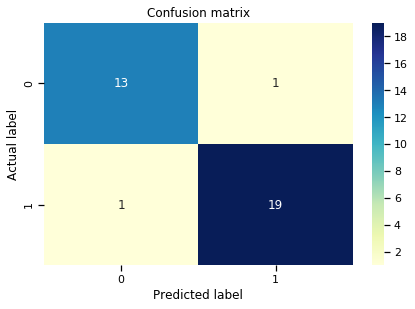

In [130]:
# confrontation entre Y obs. sur l’éch. test et la prédiction
cm_acp = metrics.confusion_matrix(testing_acp_encoded,y_pred_acp['Prédiction reg log'])
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cm_acp), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [132]:
# Jointure prediction reglog2 et verite 
y_pred_reglog2 = pd.DataFrame((logreg2_acp.predict(X_acp)),columns=['Predict_reglog2'])
y_pred_reglog2 = pd.merge(y_pred_reglog2,data,left_index=True, right_index=True ).iloc[:,0:2]

In [133]:
# Les billets mal prédits 
print(y_pred_reglog2.loc[(y_pred_reglog2['Predict_reglog2'] == 0) & (y_pred_reglog2['is_genuine'] == 1)])
print(y_pred_reglog2.loc[(y_pred_reglog2['Predict_reglog2'] == 1) & (y_pred_reglog2['is_genuine'] == 0)])

    Predict_reglog2 is_genuine
0                 0          1
69                0          1
     Predict_reglog2 is_genuine
144                1          0


### [<font color="black">Prédiction sur l'échantillon train](#sommaire)
<a id="predtrainlog2" a> 

Text(0.5, 12.5, 'Predicted label')

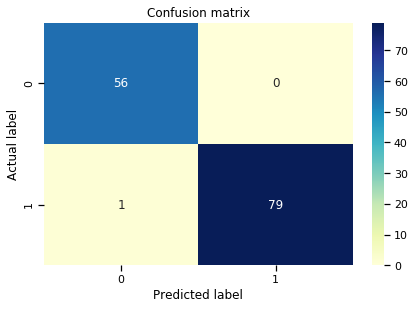

In [135]:
y_pred_train_acp = logreg2_acp.predict(X_train_acp)
y_pred_train_acp = pd.DataFrame(y_pred_train_acp,columns=['Prédiction reglog train acp'])

#calcul des probas d'affectation sur ech. test
probas_train_acp = logreg2_acp.predict_proba(X_train_acp)
probas_train_acp = pd.DataFrame(probas_train_acp,columns=['Probalité négative','Probalité positive'])

pred_train_acp = pd.merge(y_pred_train_acp,probas_train_acp,left_index=True, right_index=True )

# confrontation entre Y obs. sur l’éch. test et la prédiction
cm_train_acp = metrics.confusion_matrix(training_acp_encoded,y_pred_train_acp['Prédiction reglog train acp'])
fig, ax = plt.subplots()
# create heatmap
sns.heatmap(pd.DataFrame(cm_train_acp), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("bottom")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

### [<font color="black">Recherche des billets mal prédits ](#sommaire)
<a id="malpredits2" a> 

In [136]:
# Jointure prediction reglog2 et verite 
y_pred_reglog2 = pd.DataFrame((logreg2_acp.predict(X_acp)),columns=['Predict_reglog2'])
y_pred_reglog2 = pd.merge(y_pred_reglog2,data,left_index=True, right_index=True ).iloc[:,0:2]

# Les billets mal prédits 
print(y_pred_reglog2.loc[(y_pred_reglog2['Predict_reglog2'] == 0) & (y_pred_reglog2['is_genuine'] == 1)])
print(y_pred_reglog2.loc[(y_pred_reglog2['Predict_reglog2'] == 1) & (y_pred_reglog2['is_genuine'] == 0)])

    Predict_reglog2 is_genuine
0                 0          1
69                0          1
     Predict_reglog2 is_genuine
144                1          0


### [<font color="black">Courbe de ROC ](#sommaire)
<a id="roc2" a> 

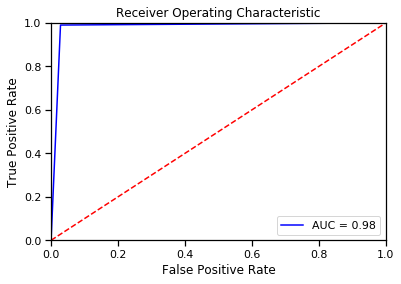

In [137]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
fpr, tpr, threshold = metrics.roc_curve(y_pred_reglog2['Predict_reglog2'],y_pred_reglog2['is_genuine'])
roc_auc = metrics.auc(fpr, tpr)
roc_auc


# method I: plt
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

### Export API 

In [ ]:
## garder le modele en memoire, transformation sur donnees ? fit et transfrom --> dump 
# garder dans un autre fichier 

# dans flask : quelles donnnes ? pour 5 billets, comment je dois les trqnsformer pour que ca marche ?
# load pour recup 
# predict qvec model 
# afficher la sortie
# datacorner 
# Postman pour faire double verification (reponse is_genuire : true or false)

In [138]:
from joblib import dump, load

In [139]:
dump(logreg2, 'export_logreg2.joblib')

['export_logreg2.joblib']